# 9. 머니게임

마지막 동적계획법 코딩 과제입니다. 교수님은 이게 어려울 거라고 언질을 주셨지만, 개인적으로 저는 '준-부문자열'이 훨씬 어려웠습니다. 그래서인지 이번 문제는 별 수고없이 바로 풀 수 있었습니다. 

## 문제

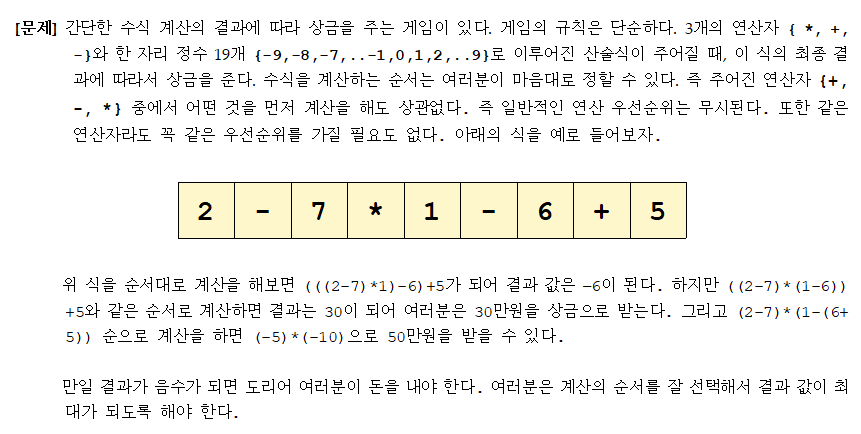

## 입출력

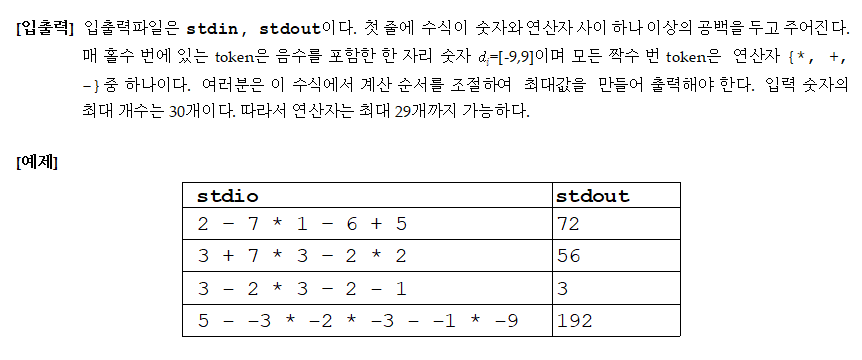

## 기본 세팅

In [48]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True) # gdrive 수정 가능하게 함 

Mounted at /content/drive/


In [49]:
# 수정
add = "_9_머니게임(동적계획법)/"

PROJECT_DIR = "/content/drive/MyDrive/2022년/1학기/Computer_Algorithm/과제 파일/" + add

def inp_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.inp'

def out_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.out'

In [51]:
def test():
  for i in range(1, 6):
    class_ = Algorithm()
    print(f"[{i}]")
    inp_path = inp_pth(i)
    with open(inp_path, 'r') as inp:
      input = inp.readlines()
    
    out_path = out_pth(i)
    with open(out_path) as out:
      answer = out.read()
    
    class_.input(input[0])
    # print(f"input : {input[0]} / {input[1]}")
    result = class_.out()
    print(f"{result == answer}\n result: {result} answer: {answer}")


In [3]:
import numpy as np

## 풀이

이 문제도 앞서 과제로 나온 동적계획법 문제처럼 2차원 리스트에 연산 결과를 저장하는 방식으로 풀면 수월하다. 다만 다른 문제와 달리 함정이 있는데, '-'가 포함되어 있다는 점이다. 이로 인해 부분최대값만 저장하면 전역최대값을 찾을 수 없는 경우가 생긴다.

위의 사실은 수학적으로 생각하면 아주 당연하다.  

$M[\ i:j\ ]$ 을 $d_i$ 부터 $d_j$까지의 숫자와 연산자를 이용해서 만들 수 있는 수의 집합이라고 하자.  

예를 들어  
$M[\ 0:2\ ]\ =\ [-2, 1, 3]$  
$M[\ 3:5\ ]\ =\ [-7, 2, 1]$라고 했을 때, 각 연산자 + - * 의 최대값은 아래와 같이 정의된다.


$max_1 = max(M[\ 0:2\ ])=3$  
$max_2 = max(M[\ 3:5\ ])=1$  
$min_1 = min(M[\ 0:2\ ])=-2$  
$min_2 = min(M[\ 3:5\ ])=-7$ 


$+_{max}\ = max_1 + max_2=3+1=4$  
$-_{max}\ = max_1 - min_2=3-(-7)=10$  
$*_{max}\ = max(max_1*max_2,\ min_1*min_2)=max(3*1,\ -2*-7)=14$

따라서 각 셀에서는 최대값 말고 최소값도 저장을 해야 제대로 된 값을 계산할 수 있다.

In [68]:

class Cell:
  def __init__(self, operator = None, max = None, min = None):
    self.operator_ = operator
    self.max = max
    self.min = min

  def __str__(self):
    return f"operator : {self.operator_} max : {self.max} min : {self.min}"
  

  def __mul__(self, another):
    if another.operator_ == '+':
      max_ = self.max + another.max
      min_ = self.min + another.min
    
    elif another.operator_ == '-':
      max_ = self.max - another.min
      min_ = self.min - another.max
    
    else:
      max_ = max([self.max * another.max, self.max * another.min, self.min * another.max, self.min * another.min])
      min_ = min([self.max * another.max, self.max * another.min, self.min * another.max, self.min * another.min])

    return Cell(self.operator_, max_, min_)    

In [71]:
class Algorithm:
  def input(self, inp):
    inp = inp.replace(' ', '')
    self.cells = []

    while len(inp) != 0:
      operator, digit, inp = self.split(inp)
      self.cells.append(Cell(operator, digit, digit))
      # print(f"{operator}, {digit}, {inp}")
    
    if self.cells[0].operator_ == '-':
      self.cells[0].operator_ = '+'
      self.cells[0].max = self.cells[0].max * -1
      self.cells[0].min = self.cells[0].min * -1

    self.make_table()
    # self.print_table()
    self.fill_table()
    # self.print_table()


  def split(self, arr):
    operator = '+'
    digit = 1
    first = True

    for i, char in enumerate(arr):
      if char.isdigit():
        if i == len(arr) -1:
          return operator, digit * int(char), []
        return operator, digit * int(char), arr[i+1:]
      elif first:
        first = False
        operator = char
      elif char == '-':
        digit = -1
  
  def make_table(self):
    self.table = []
    row = []

    for i, cell in enumerate(self.cells):
      for j in range(len(self.cells)):
        if i == j:
          row.append(cell)
        else:
          row.append(Cell())
      self.table.append(row)
      row = []

  def fill_table(self):
    lt = len(self.table)

    for d in range(1, lt):
      for i in range(0, lt - d):
        self.change_cell(i, i+d)
  

  def change_cell(self, i, j):
    cells_max = []
    cells_min = []

    for k in range(i, j):
      cell = self.table[i][k] * self.table[k+1][j]
      cells_max.append(cell.max)
      cells_min.append(cell.min)

    max_ = max(cells_max)
    min_ = min(cells_min)
    operator = self.table[i][i].operator_

    self.table[i][j] = Cell(operator, max_, min_)

  def print_table(self):
    lt = len(self.table)
    result = ""

    for i in range(lt):
      for j in range(lt):
        result += str(self.table[i][j].max) + '\t'
      
      result += '\n'
    
    print(result)

    result = ""

    for i in range(lt):
      for j in range(lt):
        if self.table[i][j].operator_ is None:
          result += ' ' + '\t'
        else:
          result += self.table[i][j].operator_ + '\t'
      
      result += '\n'
    
    print(result)

    result = ""

    for i in range(lt):
      for j in range(lt):
        result += str(self.table[i][j].min) + '\t'
      
      result += '\n'
    
    print(result)
  
  def out(self):
    return str(self.table[0][-1].max)


In [72]:
al = Algorithm()
al.input("2 - 7 * 1 - 6 + 5")
al.print_table()

2	-5	-5	37	72	
None	7	7	1	6	
None	None	1	-5	0	
None	None	None	6	11	
None	None	None	None	5	

+	+	+	+	+	
 	-	-	-	-	
 	 	*	*	*	
 	 	 	-	-	
 	 	 	 	+	

2	-5	-5	-11	-16	
None	7	7	-35	-70	
None	None	1	-5	-10	
None	None	None	6	11	
None	None	None	None	5	



In [ ]:
test()

## 최종 제출 파일

In [ ]:
class Cell:
  def __init__(self, operator = None, max = None, min = None):
    self.operator_ = operator
    self.max = max
    self.min = min

  def __str__(self):
    return f"operator : {self.operator_} max : {self.max} min : {self.min}"
  

  def __mul__(self, another):
    if another.operator_ == '+':
      max_ = self.max + another.max
      min_ = self.min + another.min
    
    elif another.operator_ == '-':
      max_ = self.max - another.min
      min_ = self.min - another.max
    
    else:
      max_ = max([self.max * another.max, self.max * another.min, self.min * another.max, self.min * another.min])
      min_ = min([self.max * another.max, self.max * another.min, self.min * another.max, self.min * another.min])

    return Cell(self.operator_, max_, min_)    

class Algorithm:
  def input(self, inp):
    inp = inp.replace(' ', '')
    self.cells = []

    while len(inp) != 0:
      operator, digit, inp = self.split(inp)
      self.cells.append(Cell(operator, digit, digit))
      # print(f"{operator}, {digit}, {inp}")
    
    if self.cells[0].operator_ == '-':
      self.cells[0].operator_ = '+'
      self.cells[0].max = self.cells[0].max * -1
      self.cells[0].min = self.cells[0].min * -1

    self.make_table()
    # self.print_table()
    self.fill_table()
    # self.print_table()


  def split(self, arr):
    operator = '+'
    digit = 1
    first = True

    for i, char in enumerate(arr):
      if char.isdigit():
        if i == len(arr) -1:
          return operator, digit * int(char), []
        return operator, digit * int(char), arr[i+1:]
      elif first:
        first = False
        operator = char
      elif char == '-':
        digit = -1
  
  def make_table(self):
    self.table = []
    row = []

    for i, cell in enumerate(self.cells):
      for j in range(len(self.cells)):
        if i == j:
          row.append(cell)
        else:
          row.append(Cell())
      self.table.append(row)
      row = []

  def fill_table(self):
    lt = len(self.table)

    for d in range(1, lt):
      for i in range(0, lt - d):
        self.change_cell(i, i+d)
  

  def change_cell(self, i, j):
    cells_max = []
    cells_min = []

    for k in range(i, j):
      cell = self.table[i][k] * self.table[k+1][j]
      cells_max.append(cell.max)
      cells_min.append(cell.min)

    max_ = max(cells_max)
    min_ = min(cells_min)
    operator = self.table[i][i].operator_

    self.table[i][j] = Cell(operator, max_, min_)

  def out(self):
    return str(self.table[0][-1].max)

al = Algorithm()
formula = input()
al.input(formula)
print(al.out())

## 결과

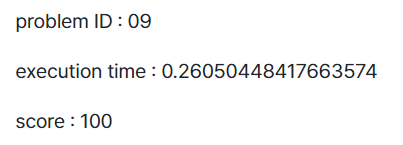